In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px


In [2]:
sns.set_theme(color_codes=True)
sns.set_style('white')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('1.1 data_banknote_authentication.csv')

In [4]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


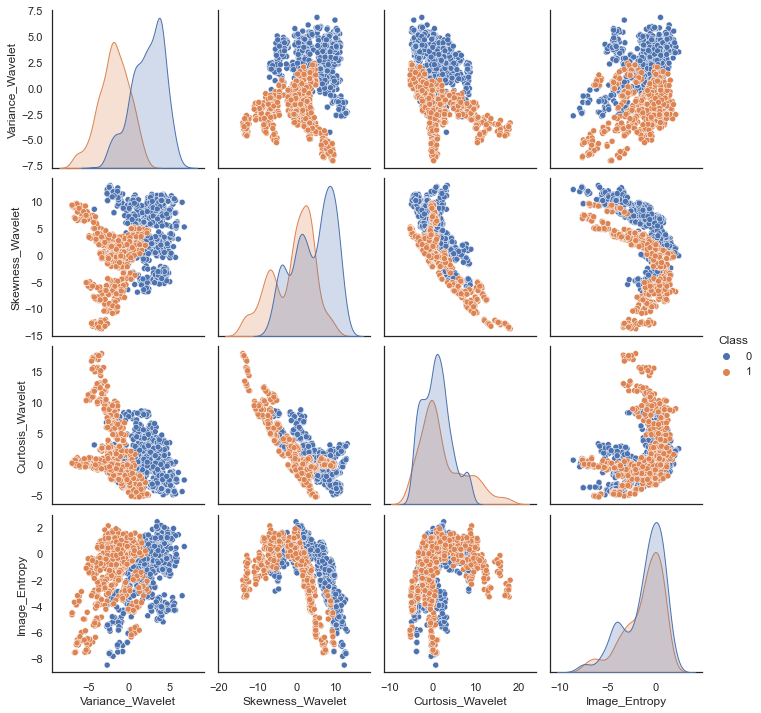

In [5]:
sns.pairplot(data=df, hue='Class')

In [6]:
df['Class'].iplot(kind='hist')

<AxesSubplot:>

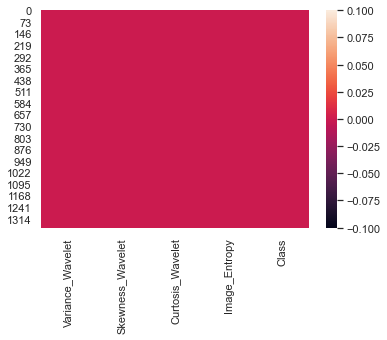

In [7]:
sns.heatmap(df.isnull())

<AxesSubplot:>

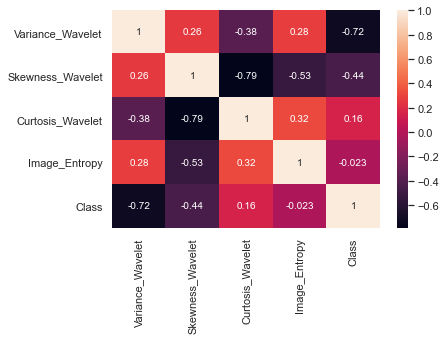

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.corr()['Class'][:-1].sort_values().iplot(kind='bar')

In [10]:
fig = px.box(df,color='Class')
fig.show()

In [11]:
X = df.drop('Class',axis=1)

In [12]:
y = df['Class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.model_selection import StratifiedKFold
SK = StratifiedKFold()

In [18]:
n_estimators=[10, 100, 200, 500, 1000]
criterion = ['gini', 'entropy']
max_features = [2,3,4]

param_grid = {'n_estimators':n_estimators, 'criterion':criterion, 'max_features':max_features}

In [19]:
rfcmodel = RandomForestClassifier()

In [20]:
grid_model = GridSearchCV(rfcmodel,param_grid,cv=SK,verbose=1)

In [21]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500, 1000]},
             verbose=1)

In [22]:
grid_model.best_params_

{'criterion': 'gini', 'max_features': 2, 'n_estimators': 100}

In [23]:
grid_pred = grid_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [25]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



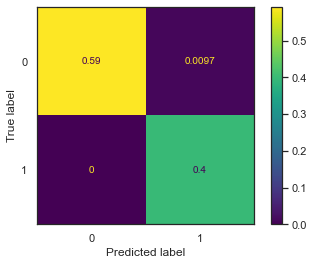

In [26]:
plot_confusion_matrix(grid_model,X_test,y_test,normalize='all')

In [27]:
errors = []
misclassification = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassification.append(n_missed)

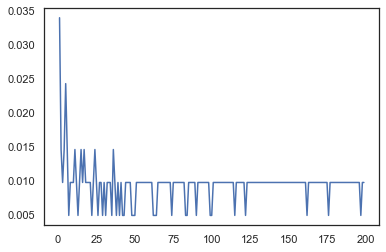

In [28]:
plt.plot(range(1,200),errors)

In [29]:
fig = px.line(x=range(1,200),y=errors,labels={"x": "n_estimators",  "y": "Error Rate"})
fig.show()

In [30]:
fig = px.line(x=range(1,200),y=misclassification,labels={"x": "n_estimators",  "y": "misclassification"})
fig.show()